<a href="https://colab.research.google.com/github/MayerT1/Pakistan_Research/blob/main/Study_area_map_inlays_GEE_to_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

import ee
import geemap
ee.Authenticate()
ee.Initialize(project='servir-ee')
Map = geemap.Map()

In [40]:

!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 23.4 MB/s eta 0:00:00


In [28]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
%cd /content/drive/MyDrive/PhD_Main_Folder/Workflows_Figures/Map_inlays

/content/drive/MyDrive/PhD_Main_Folder/Workflows_Figures/Map_inlays


In [37]:
!ls

In [3]:
!pip install descartes

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

In [17]:
js_snippet = """

var pfi_test_roi = ee.Geometry.Rectangle([72.68095513823965,34.282270256791925, 72.83888360503653,34.406429412779026])

var geometries = pfi_test_roi.geometry().geometries()

var features = geometries.map(function(g){
  return ee.Feature(ee.Geometry(g));
});

var shape = ee.FeatureCollection(features)
print(shape)

"""

In [18]:

geemap.js_snippet_to_py(
    js_snippet, add_new_cell=True, import_ee=True, import_geemap=True, show_map=True
)


In [ ]:

lines = geemap.js_snippet_to_py(js_snippet, add_new_cell=False, import_ee=True, import_geemap=True, show_map=True)
for line in lines:
    print(line.rstrip())

https://code.earthengine.google.com/0c4fdab86209ad2f57f3f979a7e4efdc

In [42]:
# Define the image and visualization parameters
Hansen_tree_cover = ee.Image('UMD/hansen/global_forest_change_2023_v1_11').select('treecover2000')
vis_params = {
    'min': 0,
    'max': 100,
    'palette': ['black', 'green']
}




# var roi_ES_1 = ee.Geometry.BBox(-89.69123369329621, 13.683060382777175, -89.29847246282746, 14.024395424404469)
# Map.addLayer(roi_ES_1, {}, "roi_ES_1")

# var roi_ES_2 = ee.Geometry.BBox(-88.76047286103248, 13.15469979438684, -88.31827315400123, 13.448718079104998)
# Map.addLayer(roi_ES_2, {}, "roi_ES_2")

# var roi_pa = ee.Geometry.BBox(70.90777969178012, 35.295641523036885, 73.71478652771762, 33.56041048564789)
# Map.addLayer(roi_pa, {}, "roi_pa")

# var roi_np = ee.Geometry.BBox(85.12181708507505, 27.405245767325813, 86.8604035108563, 26.428099401290968)
# Map.addLayer(roi_np, {}, "roi_np")


Export started. Check Google Drive for the file once the task completes.


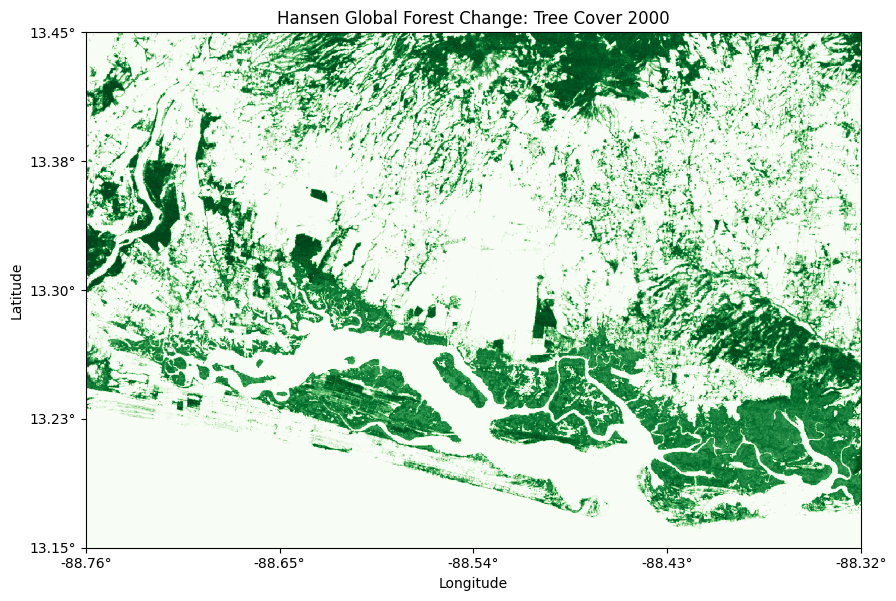

In [44]:
import rasterio
import matplotlib.pyplot as plt
from rasterio.plot import show
import numpy as np

# Load the GeoTIFF file
tif_file = 'Hansen_tree_cover_roi_ES_2.tif'  # Path to the downloaded file

# Open the file with rasterio
with rasterio.open(tif_file) as src:
    fig, ax = plt.subplots(figsize=(10, 10))

    # Show the image using rasterio's show function
    show(src, ax=ax, cmap='Greens')

    # Get image boundaries in terms of coordinates
    bounds = src.bounds
    left, bottom, right, top = bounds.left, bounds.bottom, bounds.right, bounds.top

    # Set x and y axis ticks for coordinates
    ax.set_xticks(np.linspace(left, right, num=5))
    ax.set_yticks(np.linspace(bottom, top, num=5))

    # Set tick labels to be coordinate values
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x:.2f}°'))
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'{y:.2f}°'))

    # Add axis labels and title
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title('Hansen Global Forest Change: Tree Cover 2000')

    plt.show()


In [26]:

Hansen_tree_cover = ee.Image('UMD/hansen/global_forest_change_2023_v1_11')
treeCoverVisParam = {
    "bands": ['treecover2000'],
    "min": 0,
    "max": 100,
    "palette": ['black', 'green']
}

Hansen_tree_cover_GTE = Hansen_tree_cover.gte(1)
Hansen_tree_cover_GTE_only = Hansen_tree_cover.updateMask(Hansen_tree_cover_GTE)
Map.addLayer(Hansen_tree_cover_GTE_only,treeCoverVisParam, 'Hansen_tree_cover_GTE_only')

# Map.add_gridlines(color='gray', linestyle='--', linewidth=1, opacity=0.5)

# # Add a scale bar for reference
# Map.add_scalebar(position='bottomright')

# # Display the map in Colab

Map

Map(bottom=620.9999915568043, center=[55.57834635010536, 368.13117525847093], controls=(WidgetControl(options=…

In [29]:
# Save the map as an image
Map.to_image('Hansen_tree_cover_map.jpg', monitor=True)

FileNotFoundError: [Errno 2] No such file or directory: ''

In [34]:
# Save the map as a high-resolution PNG image
Map.to_image('Hansen_tree_cover_map.png', monitor=True)

# Convert to JPG if necessary (requires PIL)
from PIL import Image

# Load and save as JPG with high quality
img = Image.open('Hansen_tree_cover_map.png')
img = img.convert("RGB")  # Convert to RGB format for JPG
img.save("Hansen_tree_cover_map.jpg", quality=95)  # Adjust quality as needed

print("Map saved as Hansen_tree_cover_map.jpg.")

FileNotFoundError: [Errno 2] No such file or directory: ''

In [ ]:
import matplotlib.pyplot as plt
import Image
import numpy

imarray = numpy.asarray(Image.open('map.jpg'))

In [21]:

# var pfi_test_roi = ee.Geometry.Rectangle([72.68095513823965,34.282270256791925, 72.83888360503653,34.406429412779026])

# var geometries = pfi_test_roi.geometry().geometries()

# var features = geometries.map(function(g){
#   return ee.Feature(ee.Geometry(g));
# });

# var shape = ee.FeatureCollection(features)
# print(shape)


pfi_test_roi = ee.Geometry.Rectangle([72.68095513823965,34.282270256791925, 72.83888360503653,34.406429412779026])

geometries = pfi_test_roi.geometries()

def func_ntg(g):
    return ee.Feature(ee.Geometry(g))

features = geometries.map(func_ntg)

shape = ee.FeatureCollection(features)
print(shape.getInfo())

pa = geemap.ee_to_df(shape)

{'type': 'FeatureCollection', 'columns': {'system:index': 'String'}, 'features': [{'type': 'Feature', 'geometry': {'type': 'Polygon', 'coordinates': [[[72.68095513823965, 34.282270256791925], [72.83888360503653, 34.282270256791925], [72.83888360503653, 34.406429412779026], [72.68095513823965, 34.406429412779026], [72.68095513823965, 34.282270256791925]]]}, 'id': '0', 'properties': {}}]}


TypeError: no numeric data to plot

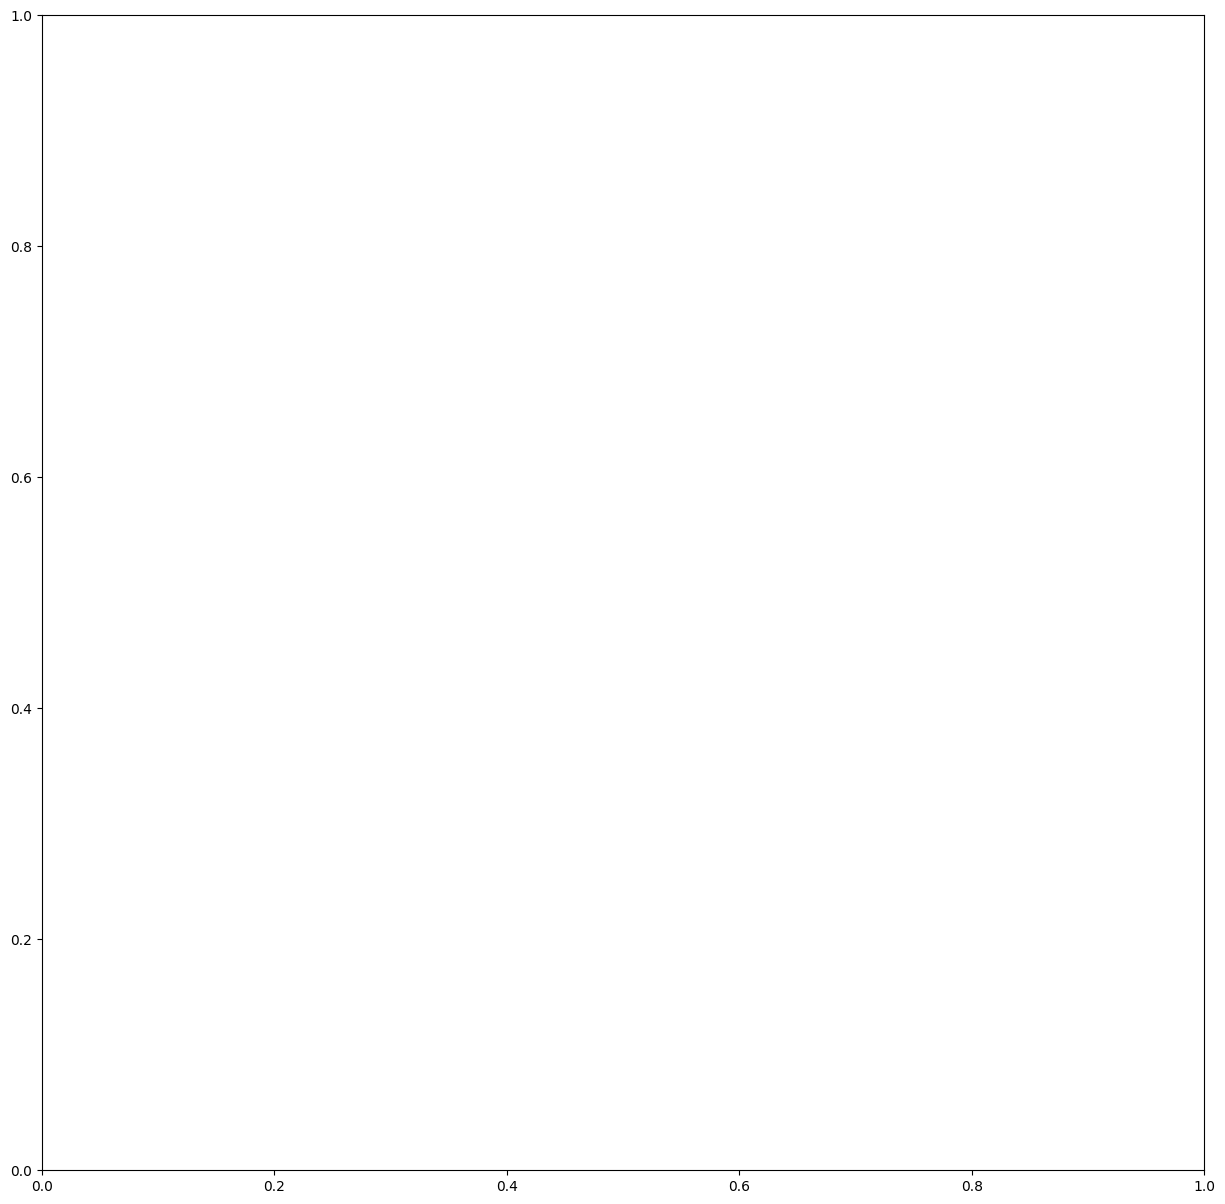

In [22]:
fig, ax = plt.subplots(figsize=(15,15))
pa.plot(ax=ax)